In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

In [10]:

train_data = pd.read_csv(r"C:\Users\769972\OneDrive - American Airlines, Inc\Documents\Kaggle\Predict_Podcast_Listening_Time\train.csv")

In [11]:
train_data

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [12]:
## Explore the Dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [13]:
train_data.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [55]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth', None)

In [56]:
# Identify outlier columns and print the rows with outliers for each column
z_scores = np.abs(zscore(train_data.select_dtypes(include='number')))
num_cols = train_data.select_dtypes(include='number').columns

for idx, col in enumerate(num_cols):
    outlier_rows = train_data[z_scores[:, idx] > 3]
    if not outlier_rows.empty:
        print(f"Outliers in column '{col}':")
        print(outlier_rows)
        print("-" * 40)

Outliers in column 'Episode_Length_minutes':
         Podcast_Name Episode_Title  Episode_Length_minutes      Genre  Host_Popularity_percentage Publication_Day Publication_Time  Guest_Popularity_percentage  Number_of_Ads Episode_Sentiment  Listening_Time_minutes
101637  Home & Living    Episode 16                  325.24  Lifestyle                       50.69         Tuesday        Afternoon                        15.01            0.0          Positive                64.31981
----------------------------------------
Outliers in column 'Number_of_Ads':
             Podcast_Name Episode_Title  Episode_Length_minutes       Genre  Host_Popularity_percentage Publication_Day Publication_Time  Guest_Popularity_percentage  Number_of_Ads Episode_Sentiment  Listening_Time_minutes
283606        Health Hour    Episode 15                  109.93      Health                       67.81          Sunday          Morning                        77.90         103.91           Neutral               103.89

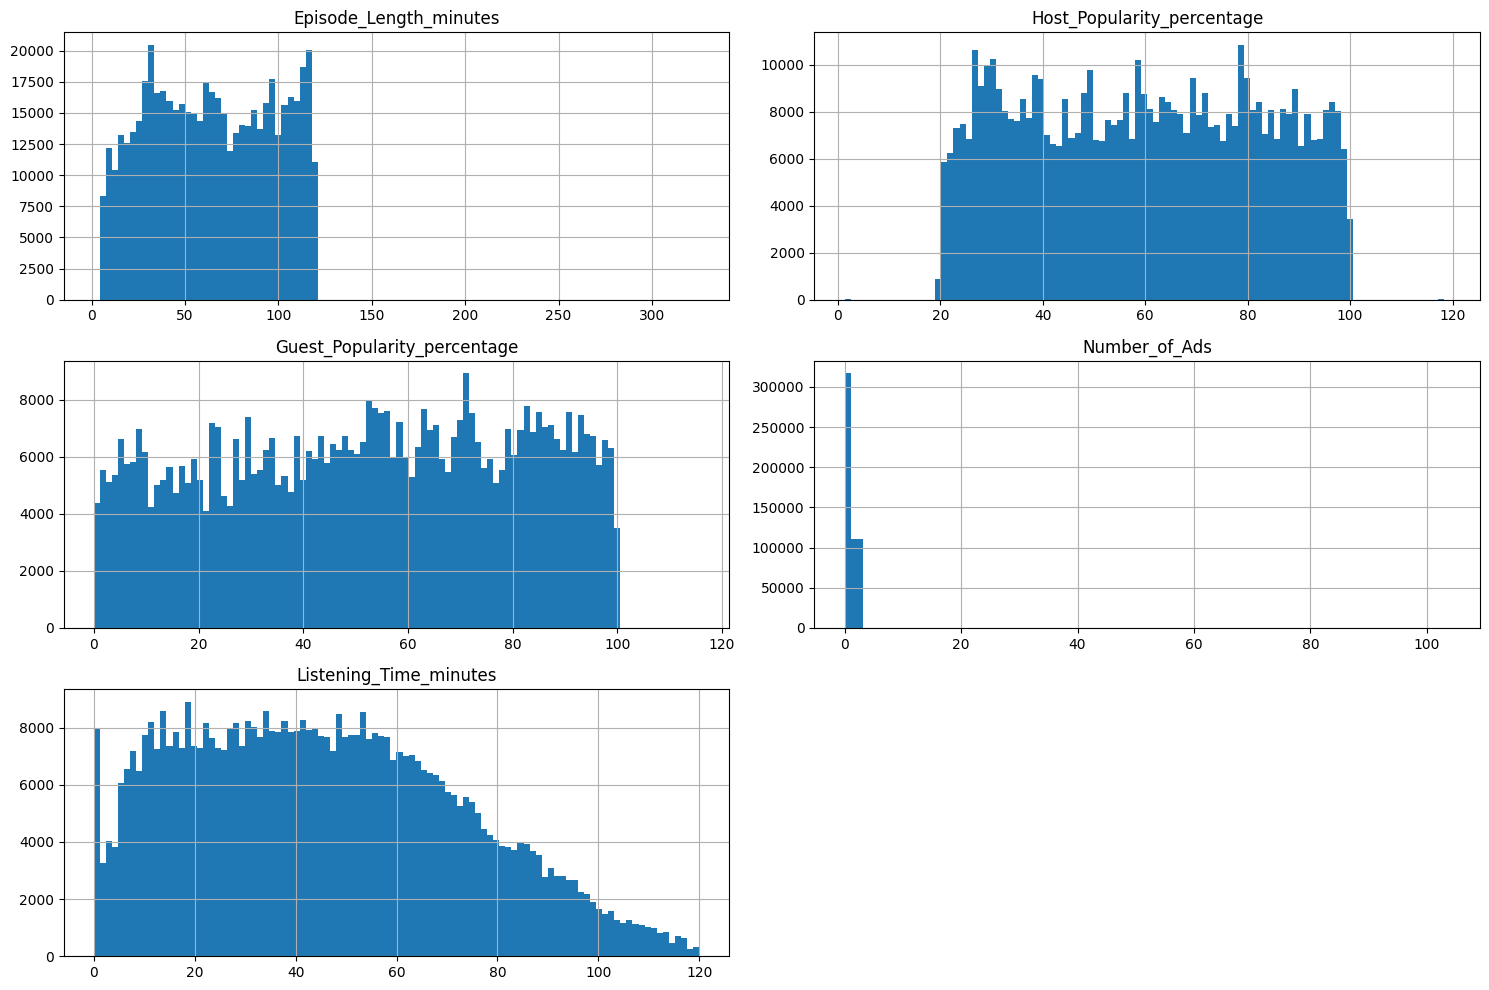

In [37]:

# Draw histogram for all numeric columns in train_data
train_data.select_dtypes(include='number').hist(figsize=(15, 10), bins=100)
plt.tight_layout()
for ax in plt.gcf().axes:
    ax.set_ylim(auto=True)  # Auto-scale y-axis
plt.show()

In [16]:
# Compute correlation matrix for only numeric columns
train_data.select_dtypes(include='number').corr()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Episode_Length_minutes,1.000000,0.021051,-0.009705,-0.051002,0.915462
Host_Popularity_percentage,0.021051,1.000000,0.023080,-0.021091,0.046111
Guest_Popularity_percentage,-0.009705,0.023080,1.000000,0.008209,-0.013251
Number_of_Ads,-0.051002,-0.021091,0.008209,1.000000,-0.115430
Listening_Time_minutes,0.915462,0.046111,-0.013251,-0.115430,1.000000


In [14]:
## Data Cleaning
# Drop the 'id' column as it is not needed for analysis
train_data.drop(['id'], axis=1, inplace=True)
# Drop records (rows) with any null values
train_data.dropna(inplace=True)

In [15]:
## Feature Selection
X = train_data.drop('Listening_Time_minutes', axis=1) #all features except target
y = train_data['Listening_Time_minutes'] #target variable

In [24]:
# Print unique values for each categorical column in the dataframe
for col in train_data.select_dtypes(exclude='number').columns:
    uni_ct = len(train_data[col].unique())
    print(f"Unique values in '{col}': {uni_ct}")
    print(sorted(train_data[col].unique()))
    print("-" * 40)

Unique values in 'Podcast_Name': 48
["Athlete's Arena", 'Brain Boost', 'Business Briefs', 'Business Insights', 'Comedy Corner', 'Crime Chronicles', 'Criminal Minds', 'Current Affairs', 'Daily Digest', 'Detective Diaries', 'Digital Digest', 'Educational Nuggets', 'Fashion Forward', 'Finance Focus', 'Fitness First', 'Funny Folks', 'Gadget Geek', 'Game Day', 'Global News', 'Health Hour', 'Healthy Living', 'Home & Living', 'Humor Hub', 'Innovators', 'Joke Junction', 'Laugh Line', 'Learning Lab', 'Life Lessons', 'Lifestyle Lounge', 'Market Masters', 'Melody Mix', 'Mind & Body', 'Money Matters', 'Music Matters', 'Mystery Matters', 'News Roundup', 'Sound Waves', 'Sport Spot', 'Sports Central', 'Sports Weekly', 'Study Sessions', 'Style Guide', 'Tech Talks', 'Tech Trends', 'True Crime Stories', 'Tune Time', 'Wellness Wave', 'World Watch']
----------------------------------------
Unique values in 'Episode_Title': 100
['Episode 1', 'Episode 10', 'Episode 100', 'Episode 11', 'Episode 12', 'Episode

In [26]:
ohe = OneHotEncoder(handle_unknown='ignore', ## ignore null
                    sparse_output=False).set_output(transform="pandas")


In [28]:
ohetransform = ohe.fit_transform(train_data.select_dtypes(exclude='number'))
ohetransform

,Podcast_Name_Athlete's Arena,Podcast_Name_Brain Boost,Podcast_Name_Business Briefs,Podcast_Name_Business Insights,Podcast_Name_Comedy Corner,Podcast_Name_Crime Chronicles,Podcast_Name_Criminal Minds,Podcast_Name_Current Affairs,Podcast_Name_Daily Digest,Podcast_Name_Detective Diaries,...,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
749993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
749997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
749998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [29]:
proc_X = pd.concat([ohetransform, X.select_dtypes(include='number')], axis=1)

In [30]:
proc_X 

,Podcast_Name_Athlete's Arena,Podcast_Name_Brain Boost,Podcast_Name_Business Briefs,Podcast_Name_Business Insights,Podcast_Name_Comedy Corner,Podcast_Name_Crime Chronicles,Podcast_Name_Criminal Minds,Podcast_Name_Current Affairs,Podcast_Name_Daily Digest,Podcast_Name_Detective Diaries,...,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,119.80,66.95,75.95,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,73.90,69.97,8.97,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,67.17,57.22,78.70,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,110.51,80.07,58.68,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,69.83,35.82,39.02,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,48.67,88.62,25.65,3.0
749993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,23.52,38.14,86.17,0.0
749997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,30.98,78.58,84.89,0.0
749998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,108.98,45.39,93.27,0.0
